# **Problem 1**

### a)

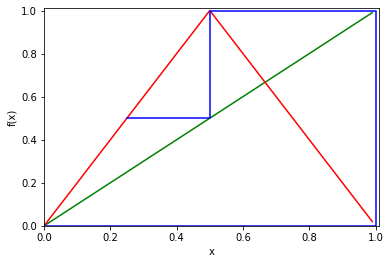

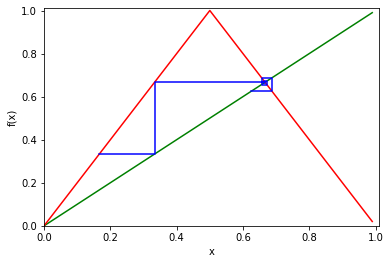

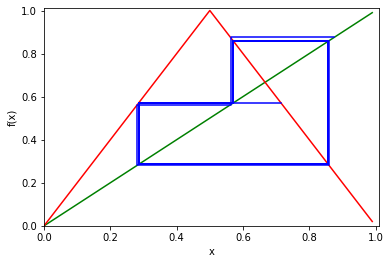

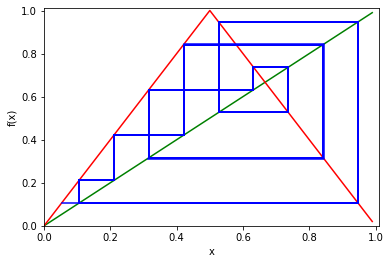

In [ ]:
#a.1) plot cobwebs

import numpy as np
import matplotlib.pyplot as plt


def func(x, c):
	return c * 1 / 2 * (1 - np.abs(2 * x - 1))


def func_n(x, c, n):
	for i in range(0, n):
		x = func(x, c)
	return x


def plot_graphical(x0, c, n):
	xv = np.linspace(0.0, 1.0, 2 * n)
	yv = np.linspace(0.0, 1.0, 2 * n)
	x = x0
	for i in range(0, n):
		xv[2 * i] = x
		x = func(x, c)
		yv[2 * i] = x
		xv[2 * i + 1] = x
		yv[2 * i + 1] = x

	plt.plot(xv, yv, 'b')

def plot_figure(initial_condition):
  plt.figure()
  plt.xlabel('x')
  plt.ylabel('f(x)')
  fac = 1.01
  xmax = 1.00
  xmin = 0.00
  ymax = 1.00
  ymin = 0.00
  plt.axis([xmin * fac, xmax * fac, ymin * fac, ymax * fac])
  xcon = np.arange(xmin, xmax, 0.01)
  plt.plot(xcon, xcon, 'g')

  c = 2
  ycon = func(xcon, c)
  plt.plot(xcon, ycon, 'r')
  plot_graphical(initial_condition, c, 50)

#case x0=1/4
plot_figure(1/4)

#case x0=1/6
plot_figure(1/6)

#case x0=5/7
plot_figure(5/7)

#case x0=1/19
plot_figure(1/19)


In [ ]:
# a.2) find the fixed points

from scipy.optimize import fsolve
import numpy as np


def func_fp(x):
   	return (1 - np.abs(2 * x - 1))-x

fixed_points = fsolve(func_fp, [0, 0.6])

print("The fixed points are: ")
for i in range (0, len(fixed_points)):
	print(fixed_points[i])


The fixed points are: 
0.0
0.6666666666666666


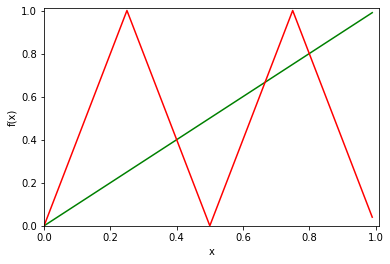

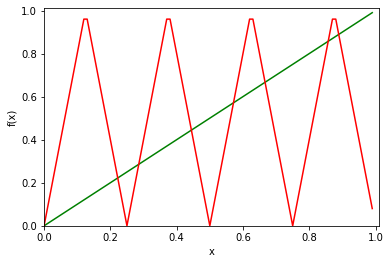

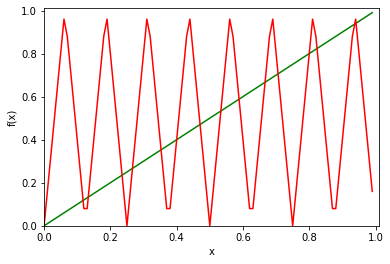

In [ ]:
# intermediary step: plot the graphs of T^2(x), T^3(x), T^4(x) for proper approximation

import numpy as np
import matplotlib.pyplot as plt


def func(x, mu):
	 return mu * 1/2 * (1 - np.abs(2 * x - 1))


def func_n(x, mu, n):
	for i in range(0, n):
		x = func(x, mu)
	return x


def plot_graphical(x0, mu, n):
	xv = np.linspace(0.0, 1.0, 2 * n)
	yv = np.linspace(0.0, 1.0, 2 * n)
	x = x0
	for i in range(0, n):
		xv[2 * i] = x
		x = func(x, mu)
		yv[2 * i] = x
		xv[2 * i + 1] = x
		yv[2 * i + 1] = x

	plt.plot(xv, yv, 'b')

fac = 1.01
xmax = 1.00
xmin = 0.00
ymax = 1.00
ymin = 0.00
mu = 2

def plot_figure(ycon):
  plt.figure()
  plt.xlabel('x')
  plt.ylabel('f(x)')

  plt.axis([xmin * fac, xmax * fac, ymin * fac, ymax * fac])

  plt.plot(xcon,xcon, 'g')
  plt.plot(xcon, ycon, 'r')
  plot_graphical(2, mu, 50)

xcon = np.arange(xmin, xmax, 0.01)


# plot T^2(x)
ycon = func(func(xcon, mu), mu)
plot_figure(ycon)

# plot T^3(x)
ycon = func(func(func(xcon, mu), mu), mu)
plot_figure(ycon)

# plot T^4(x)
ycon = func(func(func(func(xcon, mu), mu), mu), mu)
plot_figure(ycon)



In [ ]:
# a.3) find the period 2, 3 & 4 cycles

from scipy.optimize import *
import numpy as np
import matplotlib.pyplot as plt

def func(x):
	return (1 - np.abs(2 * x - 1))

def truncate_to_3_decimals(num):
  return '%.3f'%(num)

def get_periodic_points(period_nr, period_cycle):
  print(f'The cycles of period {period_nr}:')

  periodic_points = []
  fixed_points_already_used = []

  for i in range(len(period_cycle)):
    fixed_point_was_already_used = False

    for j in fixed_points_already_used:
      if truncate_to_3_decimals(period_cycle[i]) == truncate_to_3_decimals(j):
        fixed_point_was_already_used = True

    if fixed_point_was_already_used:
      continue;

    starting_fixed_point = period_cycle[i]
    current_fixed_point = period_cycle[i]

    periodic_points.append(period_cycle[i])

    found_matching_fixed_point = True
    current_fixed_point_changed = False

    while True:
      f_x_value = func(current_fixed_point)

      found_matching_fixed_point = False

      for k in range(len(period_cycle)):
        if (current_fixed_point_changed or i != k) and truncate_to_3_decimals(f_x_value) == truncate_to_3_decimals(period_cycle[k]):
          current_fixed_point = period_cycle[k]
          periodic_points.append(period_cycle[k])

          found_matching_fixed_point = True
          current_fixed_point_changed = True

          break;

      if not found_matching_fixed_point:
        periodic_points = []
        break;

      if starting_fixed_point == current_fixed_point:
        if(period_nr==len(periodic_points[:-1])):
          print(periodic_points[:-1])

          fixed_points_already_used += periodic_points[:-1]
          periodic_points = []

        break;


# Period 2 cycle
def func_comp_2(x):
    return (1 - np.abs(2 *func(x) - 1))

def cycle_2(x):
   return func_comp_2(x)-x

period_cycle_2 = fsolve(cycle_2, [0, 0.4, 0.7, 0.8])

print("Periodic points of period 2:\n"+ str(period_cycle_2))

for i in range(0, len(period_cycle_2)):
  print("\tf(", str(period_cycle_2[i]), ")=", func(period_cycle_2[i]))

get_periodic_points(2, period_cycle_2)




# Period 3 cycle
def func_comp_3(x):
  return (1 - np.abs(2 *func(func(x)) - 1))

def cycle_3(x):
   return func_comp_3(x)-x

period_cycle_3 = fsolve(cycle_3, [0, 0.2, 0.25, 0.45, 0.55, 0.7, 0.8, 0.9])

print("\n\n\nPeriodic points of period 3:\n"+ str(period_cycle_3))

for i in range(0, len(period_cycle_3)):
  print("\tf(", str(period_cycle_3[i]), ")=", func(period_cycle_3[i]))

get_periodic_points(3, period_cycle_3)



# Period 4 cycle
def func_comp_4(x):
   return 4*func(func(func(x)))*(1-func(func(func(x))))

def cycle_4(x):
   return (1 - np.abs(2 *func(func(func(x))) - 1))-x

period_cycle_4 = fsolve(cycle_4, [0, 0.08, 0.12, 0.23, 0.25, 0.36, 0.43, 0.55, 0.6, 0.65, 0.72, 0.82, 0.95, 0.96 ])

print("\n\n\nPeriodic points of period 4:\n"+ str(period_cycle_4))

for i in range(0, len(period_cycle_4)):
  print("\tf(", str(period_cycle_4[i]), ")=", func(period_cycle_4[i]))

get_periodic_points(4, period_cycle_4)


print("\nThe formula for the number of period points of period n is 4*(n-1)")


Periodic points of period 2:
[0.         0.4        0.66666667 0.8       ]
	f( 0.0 )= 0.0
	f( 0.4 )= 0.8
	f( 0.6666666666666666 )= 0.6666666666666667
	f( 0.8 )= 0.3999999999999999
The cycles of period 2:
[0.4, 0.8]



Periodic points of period 3:
[0.         0.22222222 0.28571429 0.44444444 0.57142857 0.66666667
 0.85714286 0.88888889]
	f( 0.0 )= 0.0
	f( 0.2222222222222222 )= 0.4444444444444444
	f( 0.2857142857142857 )= 0.5714285714285714
	f( 0.4444444444444444 )= 0.8888888888888888
	f( 0.5714285714285714 )= 0.8571428571428572
	f( 0.6666666666666666 )= 0.6666666666666667
	f( 0.8571428571428571 )= 0.2857142857142858
	f( 0.8888888888888888 )= 0.22222222222222232
The cycles of period 3:
[0.2222222222222222, 0.4444444444444444, 0.8888888888888888]
[0.2857142857142857, 0.5714285714285714, 0.8571428571428571]



Periodic points of period 4:
[0.         0.11764706 0.11764706 0.23529412 0.26666667 0.35294118
 0.4        0.53333333 0.58823529 0.66666667 0.70588235 0.82352941
 0.94117647 0.94117

### b)

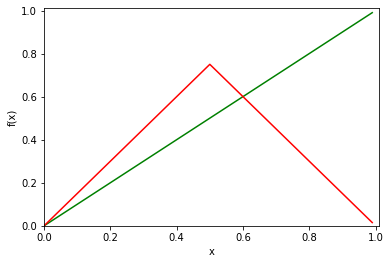

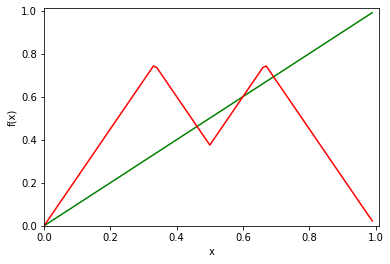

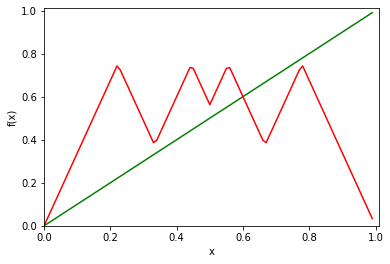

In [ ]:
# b.1) plot the graphs

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve


def func(x, c):
	return c * 1/2 * (1 - np.abs(2 * x - 1))


def func_n(x,c,n):
	for i in range(0,n):
		x = func(x, c)
	return x

def plot_graphical(x0, c,n):
	xv = np.linspace(0.0,1.0,2*n)
	yv = np.linspace(0.0,1.0,2*n)
	x =x0
	for i in range(0,n):
		xv[2*i] = x
		x = func(x, c)
		yv[2*i] = x
		xv[2*i+1] = x
		yv[2*i+1] = x




fac = 1.01
xmax = 1.00
xmin = 0.00
ymax = 1.00
ymin = 0.00
c = 3 / 2

def plot_figure(ycon):
  plt.figure()
  plt.xlabel('x')
  plt.ylabel('f(x)')

  plt.axis([xmin * fac, xmax * fac, ymin * fac, ymax * fac])
  plt.plot(xcon,xcon, 'g')
  plt.plot(xcon, ycon, 'r')

  plot_graphical(3 / 2, c, 50)
xcon = np.arange(xmin, xmax, 0.01)


# plot T(x)
ycon = func(xcon, c)
plot_figure(ycon)

# plot T^2(x)
ycon = func(func(xcon, c), c)
plot_figure(ycon)

# plot T^3(x)
ycon = func(func(func(xcon, c), c), c)
plot_figure(ycon)


In [ ]:
# b.2) find the fixed points

from scipy.optimize import fsolve

def func_fp(x):
   	return (3/2)*(1/2)*(1 - np.abs(2 * x - 1))-x

fixed_points = fsolve(func_fp, [0, 1])
print("There are "+str(len(fixed_points))+ " fixed points")
print("The fixed points are: ")
for i in range (0, len(fixed_points)):
	print(fixed_points[i])


There are 2 fixed points
The fixed points are: 
0.0
0.6


In [ ]:
# b.3) find the period 2 & 3 cycles

from scipy.optimize import *
import numpy as np

def func(x):
	return  (3/2)*(1/2)*(1 - np.abs(2 * x - 1))


def func(x):
	return (1 - np.abs(2 * x - 1))

def truncate_to_3_decimals(num):
  return '%.3f'%(num)

def get_periodic_points(period_nr, period_cycle):
  print(f'The cycles of period {period_nr}:')

  periodic_points = []
  fixed_points_already_used = []

  for i in range(len(period_cycle)):
    fixed_point_was_already_used = False

    for j in fixed_points_already_used:
      if truncate_to_3_decimals(period_cycle[i]) == truncate_to_3_decimals(j):
        fixed_point_was_already_used = True

    if fixed_point_was_already_used:
      continue;

    starting_fixed_point = period_cycle[i]
    current_fixed_point = period_cycle[i]

    periodic_points.append(period_cycle[i])

    found_matching_fixed_point = True
    current_fixed_point_changed = False

    while True:
      f_x_value = func(current_fixed_point)

      found_matching_fixed_point = False

      for k in range(len(period_cycle)):
        if (current_fixed_point_changed or i != k) and truncate_to_3_decimals(f_x_value) == truncate_to_3_decimals(period_cycle[k]):
          current_fixed_point = period_cycle[k]
          periodic_points.append(period_cycle[k])

          found_matching_fixed_point = True
          current_fixed_point_changed = True

          break;

      if not found_matching_fixed_point:
        periodic_points = []
        break;

      if starting_fixed_point == current_fixed_point:
        if(period_nr==len(periodic_points[:-1])):
          print(periodic_points[:-1])

          fixed_points_already_used += periodic_points[:-1]
          periodic_points = []

        break;


# Period 2 cycle
def func_comp_2(x):
    return (3/2)*(1/2)*(1 - np.abs(2 *func(x) - 1))

def cycle_2(x):
   return func_comp_2(x)-x

period_cycle_2 = fsolve(cycle_2, [0, 0.4, 0.7])

print("Periodic points of period 2:\n"+ str(period_cycle_2))

for i in range(0, len(period_cycle_2)):
  print("\tf(", str(period_cycle_2[i]), ")=", func(period_cycle_2[i]))

get_periodic_points(2, period_cycle_2)




# Period 3 cycle
def func_comp_3(x):
  return (3/2)*(1/2)*(1 - np.abs(2 *func_comp_2(x) - 1))

def cycle_3(x):
   return func_comp_3(x)-x

period_cycle_3 = fsolve(cycle_3, [0, 0.6])

print("\n\n\nPeriodic points of period 3:\n"+ str(period_cycle_3))

for i in range(0, len(period_cycle_3)):
  print("\tf(", str(period_cycle_3[i]), ")=", func(period_cycle_3[i]))

get_periodic_points(3, period_cycle_3)


print("\nThere are no cycles of period 2 or 3")


Periodic points of period 2:
[0.    0.375 0.75 ]
	f( 0.0 )= 0.0
	f( 0.375 )= 0.75
	f( 0.75 )= 0.5
The cycles of period 2:



Periodic points of period 3:
[0.         0.64285714]
	f( 0.0 )= 0.0
	f( 0.6428571428571429 )= 0.7142857142857142
The cycles of period 3:

There are no cycles of period 2 or 3


### c)

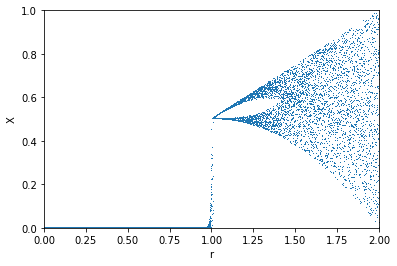

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

r_range=np.linspace(0, 2, 10000)
R = []
X = []


for r in r_range:
  R.append(r)
  x=np.random.random()
  for n in range (100):
   x= r * 1/2 * (1 - np.abs(2 * x - 1))
  for i in range(100):
    x= r * 1/2 * (1 - np.abs(2 * x - 1))
  X.append(x)


plt.plot(R, X, ls='', marker=',')
plt.ylim(0, 1)
plt.xlim(0, 2)
plt.xlabel('r')
plt.ylabel('X')
plt.show()


# **Problem 2**

### a)

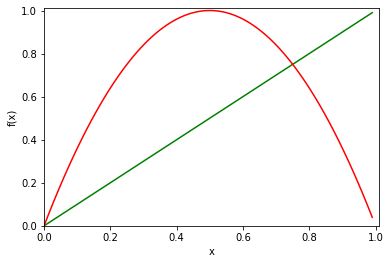

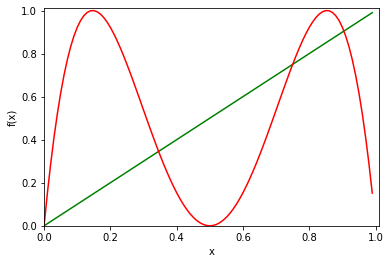

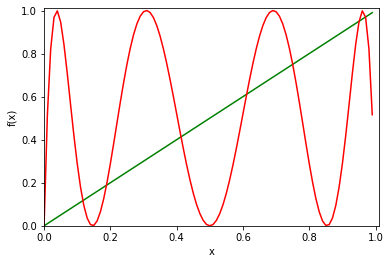

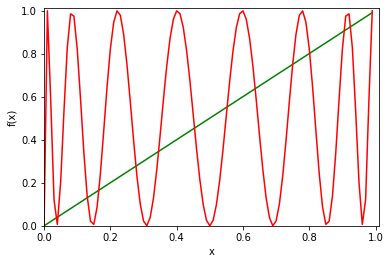

In [ ]:
# a.1) plot the graphs

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve


def func(x, c):
	return c*x*(1-x)


def func_n(x,c,n):
	for i in range(0,n):
		x = func(x, c)
	return x

def plot_graphical(x0, c,n):
	xv = np.linspace(0.0,1.0,2*n)
	yv = np.linspace(0.0,1.0,2*n)
	x =x0
	for i in range(0,n):
		xv[2*i] = x
		x = func(x, c)
		yv[2*i] = x
		xv[2*i+1] = x
		yv[2*i+1] = x




fac = 1.01
xmax = 1.00
xmin = 0.00
ymax = 1.00
ymin = 0.00
c = 4

def plot_figure(ycon):
  plt.figure()
  plt.xlabel('x')
  plt.ylabel('f(x)')

  plt.axis([xmin * fac, xmax * fac, ymin * fac, ymax * fac])
  plt.plot(xcon,xcon, 'g')
  plt.plot(xcon, ycon, 'r')

  plot_graphical(0, c, 50)
xcon = np.arange(xmin, xmax, 0.01)


# plot f(x)
ycon = func(xcon, c)
plot_figure(ycon)

# plot f^2(x)
ycon = func(func(xcon, c), c)
plot_figure(ycon)

# plot f^3(x)
ycon = func(func(func(xcon, c), c), c)
plot_figure(ycon)

# plot f^4(x)
ycon = func(func(func(func(xcon, c), c), c), c)
plot_figure(ycon)

In [ ]:
# a.2) find the fixed points

from scipy.optimize import fsolve

def func_fp(x):
   	return 4*x*(1-x)-x

fixed_points = fsolve(func_fp, [0, 0.8])
print("There are "+str(len(fixed_points))+ " fixed points")
print("The fixed points are: ")
for i in range (0, len(fixed_points)):
	print(fixed_points[i])


There are 2 fixed points
The fixed points are: 
0.0
0.7500000000000002


In [ ]:
# a.3) find the period 2, 3 & 4 cycles

from scipy.optimize import fsolve

def func(x):
	return 4*x*(1-x)

def truncate_to_3_decimals(num):
  return '%.3f'%(num)

def get_periodic_points(period_nr, period_cycle):
  print(f'The cycles of period {period_nr}:')

  periodic_points = []
  fixed_points_already_used = []

  for i in range(len(period_cycle)):
    fixed_point_was_already_used = False

    for j in fixed_points_already_used:
      if truncate_to_3_decimals(period_cycle[i]) == truncate_to_3_decimals(j):
        fixed_point_was_already_used = True

    if fixed_point_was_already_used:
      continue;

    starting_fixed_point = period_cycle[i]
    current_fixed_point = period_cycle[i]

    periodic_points.append(period_cycle[i])

    found_matching_fixed_point = True
    current_fixed_point_changed = False

    while True:
      f_x_value = func(current_fixed_point)

      found_matching_fixed_point = False

      for k in range(len(period_cycle)):
        if (current_fixed_point_changed or i != k) and truncate_to_3_decimals(f_x_value) == truncate_to_3_decimals(period_cycle[k]):
          current_fixed_point = period_cycle[k]
          periodic_points.append(period_cycle[k])

          found_matching_fixed_point = True
          current_fixed_point_changed = True

          break;

      if not found_matching_fixed_point:
        periodic_points = []
        break;

      if starting_fixed_point == current_fixed_point:
        if(period_nr==len(periodic_points[:-1])):
          print(periodic_points[:-1])

          fixed_points_already_used += periodic_points[:-1]
          periodic_points = []

        break;

# Period 2 cycle
def func_comp_2(x):
   return 4*func(x)*(1-func(x))

def cycle_2(x):
   return func_comp_2(x)-x

period_cycle_2 = fsolve(cycle_2, [0, 0.35, 0.75, 0.9])

print("Periodic points of period 2:\n"+ str(period_cycle_2))

for i in range(0, len(period_cycle_2)):
  print("\tf(", str(period_cycle_2[i]), ")=", func(period_cycle_2[i]))

get_periodic_points(2, period_cycle_2)




# Period 3 cycle
def func_comp_3(x):
   return 4*func(func(x))*(1-func(func(x)))

def cycle_3(x):
   return func_comp_3(x)-x

period_cycle_3 = fsolve(cycle_3, [0, 0.1, 0.18, 0.45, 0.6, 0.78, 0.92, 0.94])

print("\n\n\nPeriodic points of period 3:\n"+ str(period_cycle_3))

for i in range(0, len(period_cycle_3)):
  print("\tf(", str(period_cycle_3[i]), ")=", func(period_cycle_3[i]))

get_periodic_points(3, period_cycle_3)



# Period 4 cycle
def func_comp_4(x):
   return 4*func(func(func(x)))*(1-func(func(func(x))))

def cycle_4(x):
   return func_comp_4(x)-x

period_cycle_4 = fsolve(cycle_4, [0, 0.05, 0.06, 0.15, 0.16, 0.25, 0.35, 0.55, 0.65, 0.75, 0.82, 0.91, 0.92, 0.98 ])

print("\n\n\nPeriodic points of period 4:\n"+ str(period_cycle_4))

for i in range(0, len(period_cycle_4)):
  print("\tf(", str(period_cycle_4[i]), ")=", func(period_cycle_4[i]))

get_periodic_points(4, period_cycle_4)

Periodic points of period 2:
[0.        0.3454915 0.75      0.9045085]
	f( 0.0 )= 0.0
	f( 0.3454915028116739 )= 0.9045084971864202
	f( 0.75 )= 0.75
	f( 0.9045084971846034 )= 0.34549150282181496
The cycles of period 2:
[0.3454915028116739, 0.9045084971846034]



Periodic points of period 3:
[0.         0.11697778 0.1882551  0.41317591 0.61126047 0.75
 0.95048443 0.95048443]
	f( 0.0 )= 0.0
	f( 0.11697777788448856 )= 0.41317590946278326
	f( 0.18825509787664188 )= 0.6112604640003915
	f( 0.4131759109853268 )= 0.9698463102670885
	f( 0.6112604669772889 )= 0.9504844339519825
	f( 0.7499999998729557 )= 0.7500000002540885
	f( 0.9504844339744113 )= 0.1882550989870171
	f( 0.9504844349351899 )= 0.18825509552449077
The cycles of period 3:
[0.18825509787664188, 0.6112604669772889, 0.9504844339744113]



Periodic points of period 4:
[0.         0.04322727 0.04322727 0.1654347  0.1654347  0.27713082
 0.3454915  0.55226423 0.6368315  0.75       0.80131732 0.9045085
 0.92510857 0.9890738 ]
	f( 0.0 )= 0.0


### b)

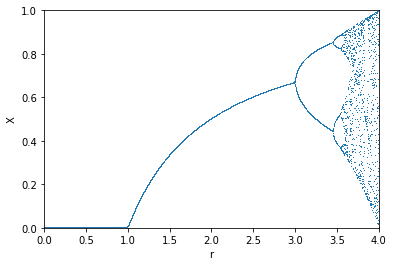

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


r_range=np.linspace(0, 4, 10000)
R = []
X = []


for r in r_range:
  R.append(r)
  x=np.random.random()
  for n in range (100):
   x= r*x*(1-x)
  for i in range(100):
    x= r*x*(1-x)
  X.append(x)


plt.plot(R, X, ls='', marker=',')
plt.ylim(0, 1)
plt.xlim(0, 4)
plt.xlabel('r')
plt.ylabel('X')
plt.show()


### c)

In [ ]:
# c.1) miu value for 2 alternating values
print("From the bifurcation diagram, we can deduce that any value of miu between 3 and 3.5 will satisfy the condition")

From the bifurcation diagram, we can deduce that any value of miu between 3 and 3.5 will satisfy the condition


In [ ]:
# c.2) generic period points

from sympy import *

x=Symbol('x')
miu=Symbol('miu')

f=miu*x*(1-x)
f_comp_2=miu*f*(1-f)
cycle_condition=f_comp_2-x

print("The generic period-2 points equation is: ", cycle_condition)

period_points=solve(cycle_condition, x)
print("\nThe generic period-2 points are:")
for i in period_points:
  print(i)

The generic period-2 points equation is:  miu**2*x*(1 - x)*(-miu*x*(1 - x) + 1) - x

The generic period-2 points are:
0
(miu - 1)/miu
(miu - sqrt(miu**2 - 2*miu - 3) + 1)/(2*miu)
(miu + sqrt(miu**2 - 2*miu - 3) + 1)/(2*miu)


# **Problem 3**

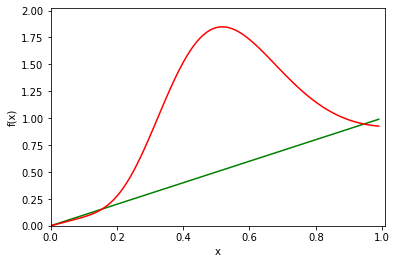

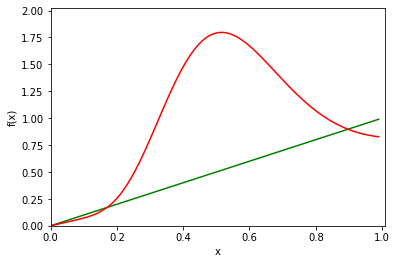

In [ ]:
# plot graphs for proper approximation

import math
from scipy.optimize import fsolve

def Lasota(x, a):
  return (1-a)*x+1.1*(10**6)*(x**8)*(math.e)**(-16*x)


def func_n(x, a, n):
	for i in range(0, n):
		x = Lasota(x, a)
	return x

def plot_graphical(x0, a, n):
	xv = np.linspace(0.0, 1.0, 2 * n)
	yv = np.linspace(0.0, 1.0, 2 * n)
	x = x0
	for i in range(0, n):
		xv[2 * i] = x
		x = Lasota(x, a)
		yv[2 * i] = x
		xv[2 * i + 1] = x
		yv[2 * i + 1] = x

def plot_figure(initial_condition):
  plt.figure()
  plt.xlabel('x')
  plt.ylabel('f(x)')
  fac = 1.01
  xmax = 1.00
  xmin = 0.00
  ymax = 2.00
  ymin = 0.00

  plt.axis([xmin * fac, xmax * fac, ymin * fac, ymax * fac])
  plt.plot(xcon, xcon, 'g')
  plt.plot(xcon, ycon, 'r')
  plot_graphical(0, 0.2, 50)

def plot_figure2(initial_condition):
  plt.figure()
  plt.xlabel('x')
  plt.ylabel('f(x)')
  fac = 1.01
  xmax = 1.00
  xmin = 0.00
  ymax = 2.00
  ymin = 0.00

  plt.axis([xmin * fac, xmax * fac, ymin * fac, ymax * fac])
  plt.plot(xcon, xcon, 'g')
  plt.plot(xcon, ycon, 'r')
  plot_graphical(0, 0.3, 50)

xcon = np.arange(xmin, xmax, 0.01)

# plot case a=0.2
ycon = Lasota(xcon, 0.2)
plot_figure(ycon)


# plot case a=0.3
ycon = Lasota(xcon, 0.3)
plot_figure(ycon)



In [ ]:
#find the fixed points and test their stability
from scipy.optimize import *
from sympy import *
import math

def Lasota(x, a):
  return (1-a)*x+1.1*(10**6)*(x**8)*(math.e)**(-16*x)-x

def Lasota_derivative(x, a):
  return -17.6*(10**6)*(x**8)*(math.e)**(-16*x)+8.8*(10**6)*(x**7)*(math.e)**(-16*x)+ (1-a)
fixed_points = fsolve(Lasota, [0, 0.15, 0.94], args=(0.2))
print("The fixed points are"+ str(fixed_points))



counts1=0
countu1=0
counts2=0
countu2=0

for i in range(0, len(fixed_points)):
  print("f(", str(fixed_points[i]), ")=", Lasota_derivative(fixed_points[i], 0.2))
  if abs(Lasota_derivative(fixed_points[i], 0.2))>1:
    print(str(fixed_points[i]), "is unstable")
    countu1=countu1+1
  elif abs(Lasota_derivative(fixed_points[i], 0.2))<1:
    print(str(fixed_points[i]), "is stable")
    counts1=counts1+1
  else:
    print(str(fixed_points[i]), "cannot be classified as stable or unstable")
print("\nFor a=0.2, there are ", countu1, " unstable fixed points and ", counts1, " stable points")




fixed_points2 = fsolve(Lasota, [0, 0.18, 0.95], args=(0.3))
print("\n\nThe fixed points are"+ str(fixed_points2))

for i in range(0, len(fixed_points2)):
  print("f'(", str(fixed_points2[i]), ")=", Lasota_derivative(fixed_points2[i], 0.3))
  if abs(Lasota_derivative(fixed_points2[i], 0.3))>1:
    print(str(fixed_points[i]), "is unstable")
    countu2=countu2+1
  elif abs(Lasota_derivative(fixed_points2[i], 0.3))<1:
    print(str(fixed_points2[i]), "is stable")
    counts2=counts2+1
  else:
    print(str(fixed_points2[i]), "cannot be classified as stable or unstable")

print("\nFor a=0.3, there are ", countu2, " unstable fixed points and ", counts2, " stable points")

The fixed points are[0.         0.15534532 0.94549638]
f( 0.0 )= 0.8
0.0 is stable
f( 0.15534531501218615 )= 1.9028949935196189
0.15534531501218615 is unstable
f( 0.9454963838302524 )= -0.6255884288338038
0.9454963838302524 is stable

For a=0.2, there are  1  unstable fixed points and  2  stable points


The fixed points are[0.         0.17035428 0.8972315 ]
f'( 0.0 )= 0.7
0.0 is stable
f'( 0.1703542804409837 )= 2.2822994539243195
0.15534531501218615 is unstable
f'( 0.8972314961002545 )= -1.2067111812806715
0.9454963838302524 is unstable

For a=0.3, there are  2  unstable fixed points and  1  stable points


# **Problem 4**

### a)

In [ ]:
#find and test the fixed points

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

def f(x):
  return x ** 3 - 2 * x

def f_fp(x):
  return x ** 3 - 3 * x

fixed_points = fsolve(f_fp, [-1.5, 0, 1.5])

def f_d(x):
  return 3 * x ** 2 - 2

def classify_fixed_point(fixed_point):
  # |f(p)'|
  fp_d_abs = abs(f_d(fixed_point))

  print(f'The {fixed_point} fixed point ', end = '')

  if fp_d_abs < 1:
    print('is attractive')
  elif fp_d_abs > 1:
    print('is repelling')
  else:
    print('may be attractive, repulsive, or none of these')

for fixed_point in fixed_points:
  classify_fixed_point(fixed_point)

The -1.73205080729226 fixed point is repelling
The 0.0 fixed point is repelling
The 1.7320508078453183 fixed point is repelling


### b)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

def f(x):
  return x ** 3 - 2 * x

def f_comp_f(x):
   return f(x)**3-2*f(x)

def cycle_2_condition(x):
   return f_comp_f(x)-x

# f(x) derivated
def f_d(x):
  return 3 * x ** 2 - 2

period_cycle = fsolve(cycle_2_condition, [-1, 0, 1])
print("The fixed points are:", period_cycle)

print('f has a 2-periodic cycle {−1, 1} because:')
print('f(-1) =', f(-1))
print('f(1) =', f(1))

gamma_x0 = abs(f_d(-1) * f_d(1))

print('the cycle is', end=' ')

if gamma_x0 < 1:
  print('attractive')
elif gamma_x0 > 1:
  print('repulsive')
else:
    print('impossible to categorize with this method')

The fixed points are: [-1.  0.  1.]
f has a 2-periodic cycle {−1, 1} because:
f(-1) = 1
f(1) = -1
the cycle is impossible to categorize with this method


### c)

The graphs indicate that the cycle {-1, 1} is attractive


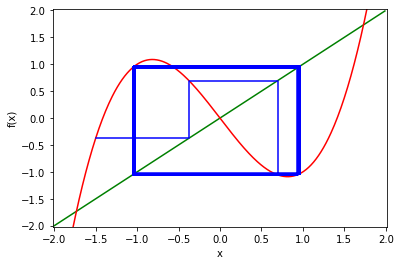

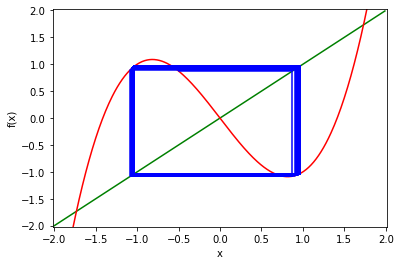

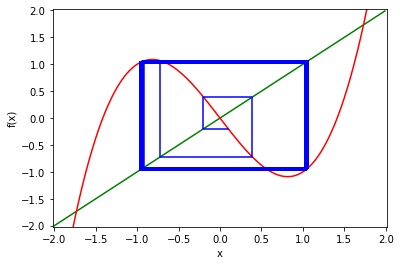

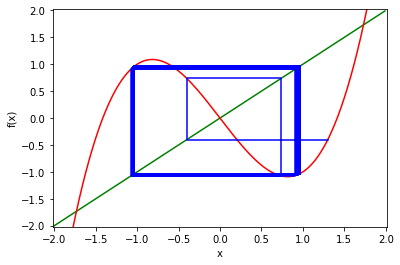

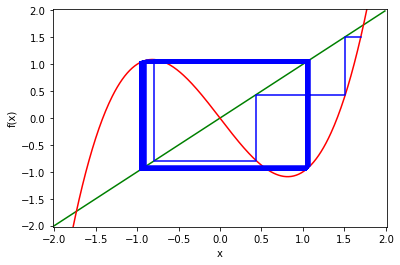

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
	return x**3-2*x


def func_n(x,n):
	for i in range(0,n):
		x = func(x)
	return x


def plot_graphical(x0,n):
	xv = np.linspace(0.0,1.0,2*n)
	yv = np.linspace(0.0,1.0,2*n)
	x =x0
	for i in range(0,n):
		xv[2*i] = x
		x = func(x)
		yv[2*i] = x
		xv[2*i+1] = x
		yv[2*i+1] = x

	plt.plot(xv,yv,'b')


def plot_figure(initial_condition):
	plt.figure()
	plt.xlabel('x')
	plt.ylabel('f(x)')

	fac = 1.01
	xmax = 2.00
	xmin = -2.00
	ymax = 2.00
	ymin = -2.00

	plt.axis([xmin * fac, xmax * fac, ymin * fac, ymax * fac])
	xcon = np.arange(xmin, xmax, 0.01)
	plt.plot(xcon, xcon, 'g')


	ycon = func(xcon)
	plt.plot(xcon, ycon, 'r')
	plot_graphical(initial_condition, 50)

plot_figure(-1.5)
plot_figure(-0.5)
plot_figure(0.1)
plot_figure(1.3)
plot_figure(1.7)


print("The graphs indicate that the cycle {-1, 1} is attractive")

